In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#Récupérer le dataset qu'on a construit
data = pd.read_csv('../input/three-sen-vanz/three_sentences.csv') 
data = data.dropna()
data = data.reset_index(drop=True)
print(data.shape)
#Visualisation du dataset
data.head()

In [ ]:
#Créer une nouvelle dataset qui a les columns Cleaned_context, Follow-up 
df = data.filter(['Follow-up','Cleaned_context'], axis=1)
df.head()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(data=df, x='Follow-up', hue = "Follow-up" )

In [ ]:
df['Follow-up'].value_counts(normalize=True).plot(kind='pie', autopct="%.1f")

In [ ]:
#Supprimer les stop words
import re
from nltk.corpus import stopwords

StopWords = set(stopwords.words('english'))

def remove_SW(contexte):
    
    contexte = contexte.lower() # Rendre en miniscule 
    contexte = ' '.join(word for word in contexte.split() if word not in StopWords) # supprimer les Stpwords
    return contexte
    
df['Cleaned_context'] = df['Cleaned_context'].apply(remove_SW)

In [ ]:
#Stemming du contexte
from nltk.stem import SnowballStemmer 

stemmer = SnowballStemmer("english")
def stemming(contexte):
    return " ".join([stemmer.stem(word) for word in contexte.split()])


#Lemmatization du contexte 
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatizing(contexte):
    return " ".join([lemmatizer.lemmatize(word) for word in contexte.split()])

In [ ]:
df['Cleaned_context'] = df['Cleaned_context'].apply(lambda contexte: stemming(contexte))

df['Cleaned_context'] = df['Cleaned_context'].apply(lambda contexte: lemmatizing(contexte))

In [ ]:
contexte , influence = df['Cleaned_context'] , df['Follow-up']

In [ ]:
from nltk.tokenize import word_tokenize
all_words = []
for sent in contexte:
    tokenize_word = word_tokenize(sent)
    for word in tokenize_word:
         all_words.append(word)
            
print(len(all_words))

In [ ]:
#Supprimer les mots dont la fréquence d'apparition est égale à 1, dans tout l'ensemble des contextes.
from nltk.probability import FreqDist
fdist = FreqDist(all_words)
top_ten = fdist.most_common(1528)
#print((top_ten))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
#Représenter les contextes dans la forme TF_IDF
tvec1  = TfidfVectorizer(max_features=1528).fit(contexte)


In [ ]:
#Division de notre data, 80 % pour l'apprentissage et 20 % pour le test.
x_train, x_test, y_train, y_test = train_test_split(contexte, influence, test_size=0.2, random_state=42)

x_train_tfidf = tvec1.transform(x_train)
x_test_tfidf = tvec1.transform(x_test)

In [ ]:
from sklearn import metrics
import pandas as pd
from sklearn import tree
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

import statistics 
import numpy as np
import pickle

In [ ]:
modelNB = MultinomialNB() 

modelNB.fit(x_train_tfidf, y_train)

#Prédire sur note ensemble de tests
predictionNB = modelNB.predict(x_test_tfidf)
   
#Évaluation de notre modèle 
print(f"Taux de précision : {accuracy_score(y_test, predictionNB) * 100} %\n\n")
print(f"Rapport de classification : \n\n{classification_report(y_test, predictionNB)}\n\n")

In [ ]:
modelSVM = OneVsOneClassifier(SVC())

modelSVM.fit(x_train_tfidf, y_train)
   
predictionSVM = modelSVM.predict(x_test_tfidf)
   
print(f"Taux de précision : {accuracy_score(y_test, predictionSVM) * 100} %\n\n")
print(f" Rapport de classification  : \n\n{classification_report(y_test, predictionSVM)}\n\n")

In [ ]:
modelKNN = KNeighborsClassifier(n_neighbors=6)

# Fitting the model with training data
modelKNN.fit(x_train_tfidf, y_train)
   
# Making a prediction on the test set
predictionKNN = modelKNN.predict(x_test_tfidf)
   
# Evaluating the model
print(f"Taux de précision : {accuracy_score(y_test, predictionKNN) * 100} %\n\n")
print(f" Rapport de classification  : \n\n{classification_report(y_test, predictionKNN)}\n\n")

In [ ]:
modelDT = DecisionTreeClassifier() 
   
# Fitting the model with training data
modelDT.fit(x_train_tfidf, y_train)
   
# Making a prediction on the test set
predictionDT = modelDT.predict(x_test_tfidf)
   
# Evaluating the model
print(f"Taux de précision : {accuracy_score(y_test, predictionDT) * 100} %\n\n")
print(f" Rapport de classification  : \n\n{classification_report(y_test, predictionDT)}\n\n")


In [ ]:
modelRF = RandomForestClassifier() 
   
# Fitting the model with training data
modelRF.fit(x_train_tfidf, y_train)
   
# Making a prediction on the test set
predictionRF = modelRF.predict(x_test_tfidf)
   
# Evaluating the model
print(f"Taux de précision : {accuracy_score(y_test, predictionRF) * 100} %\n\n")
print(f" Rapport de classification  : \n\n{classification_report(y_test, predictionRF)}\n\n")


In [ ]:
LR = OneVsRestClassifier(LogisticRegression())

LR.fit(x_train_tfidf, y_train)

predictionLR = LR.predict(x_test_tfidf)
   
print(f"Taux de précision : {accuracy_score(y_test, predictionLR) * 100} %\n\n")
print(f" Rapport de classification  : \n\n{classification_report(y_test, predictionLR)}\n\n")


# **CROSS VALIDATION**

In [ ]:
x_tfidf = tvec1.transform(contexte)

In [ ]:
l=[]

cv = KFold(n_splits=10, random_state=1, shuffle=True)                                     
NBcv = MultinomialNB()                                                                  
scores = cross_val_score(NBcv, x_tfidf, influence, scoring='accuracy', cv=cv, n_jobs=-1) 
print(scores.mean())

l.append(format(scores.mean()* 100,".0f"))
                              

In [ ]:
SVMcv= OneVsOneClassifier(SVC())
# evaluate model
                                                  
cv = KFold(n_splits=10, random_state=1, shuffle=True)                                     
scores = cross_val_score(SVMcv,  x_tfidf, influence, scoring='accuracy', cv=cv, n_jobs=-1) 
print(scores.mean())
l.append(format(scores.mean()* 100,".0f"))


In [ ]:
KNNcv = KNeighborsClassifier(n_neighbors=6)
                                                  
cv = KFold(n_splits=10, random_state=1, shuffle=True)                                     
scores = cross_val_score(KNNcv,x_tfidf, influence, scoring='accuracy', cv=cv, n_jobs=-1) 
print(scores.mean())

l.append(format(scores.mean()* 100,".0f"))


In [ ]:
DTcv =DecisionTreeClassifier()
                                                  
cv = KFold(n_splits=10, random_state=1, shuffle=True)                                     
scores = cross_val_score(DTcv, x_tfidf, influence, scoring='accuracy', cv=cv, n_jobs=-1) 
print(scores.mean())

l.append(format(scores.mean()* 100,".0f"))


In [ ]:
RFcv =RandomForestClassifier()
                                                  
cv = KFold(n_splits=10, random_state=1, shuffle=True)                                     
scores = cross_val_score(RFcv, x_tfidf, influence, scoring='accuracy', cv=cv, n_jobs=-1) 
print(scores.mean())

l.append(format(scores.mean()* 100,".0f"))


In [ ]:
LRcv = OneVsOneClassifier(LogisticRegression())

cv = KFold(n_splits=10, random_state=1, shuffle=True)                                     
scores = cross_val_score(LRcv, x_tfidf, influence, scoring='accuracy', cv=cv, n_jobs=-1) 
print(scores.mean())

l.append(format(scores.mean()* 100,".0f"))


In [ ]:
import matplotlib.pyplot as plt

labels = ["MultiNB","Svm", "Knn", "DecisionT", "RandomF", "LogisticR"]
         
y_positions = range(len(labels))

        
plt.bar(labels, [int(x) for x in l])
plt.xlabel("Algorithme")
plt.ylabel(" Précision %")
plt.title('Précision pour chaque algorithme avec Cross Validation')

ax = plt.gca()
plt.bar_label(ax.containers[0])


plt.show()

plt.savefig('m.png')

# **CLASSIFICATION BINAIRE**

In [ ]:
influence = influence.replace(1, 0)
influence = influence.replace(2, 1)
influence = influence.replace(3, 1)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(contexte, influence, test_size=0.2, random_state=42)

x_train_tfidf = tvec1.transform(x_train)
x_test_tfidf = tvec1.transform(x_test)

In [ ]:
modelNB = MultinomialNB() 

# Fitting the model with training data
modelNB.fit(x_train_tfidf, y_train)
# Making a prediction on the test set
predictionNB = modelNB.predict(x_test_tfidf)
   
# Evaluating the model
print(f"Taux de précision : {accuracy_score(y_test, predictionNB) * 100} %\n\n")
print(f"Rapport de classification : \n\n{classification_report(y_test, predictionNB)}\n\n")

In [ ]:
modelSVM = SVC()
   
# Fitting the model with training data
modelSVM.fit(x_train_tfidf, y_train)
   
# Making a prediction on the test set
predictionSVM = modelSVM.predict(x_test_tfidf)
   
# Evaluating the model
print(f"Taux de précision : {accuracy_score(y_test, predictionSVM) * 100} %\n\n")
print(f" Rapport de classification  : \n\n{classification_report(y_test, predictionSVM)}\n\n")

In [ ]:
modelKNN = KNeighborsClassifier(n_neighbors=6)

modelKNN.fit(x_train_tfidf, y_train)
   
predictionKNN = modelKNN.predict(x_test_tfidf)
   
print(f"Taux de précision : {accuracy_score(y_test, predictionKNN) * 100} %\n\n")
print(f" Rapport de classification  : \n\n{classification_report(y_test, predictionKNN)}\n\n")

In [ ]:
modelDT = DecisionTreeClassifier() 
   
modelDT.fit(x_train_tfidf, y_train)
   
predictionDT = modelDT.predict(x_test_tfidf)
   
print(f"Taux de précision : {accuracy_score(y_test, predictionDT) * 100} %\n\n")
print(f" Rapport de classification  : \n\n{classification_report(y_test, predictionDT)}\n\n")


In [ ]:
with open('modelDT_BI','wb') as file:
    pickle.dump(modelDT,file)

In [ ]:
modelRF = RandomForestClassifier() 
   
modelRF.fit(x_train_tfidf, y_train)
   
predictionRF = modelRF.predict(x_test_tfidf)
   
print(f"Taux de précision : {accuracy_score(y_test, predictionRF) * 100} %\n\n")
print(f" Rapport de classification  : \n\n{classification_report(y_test, predictionRF)}\n\n")


In [ ]:
tvec1  = TfidfVectorizer(max_features=1528).fit(saved_corpus)
x_train_tfidf, x_test_tfidf, y_train, y_test = train_test_split(saveddata123['TF_IDF'], saveddata123['FOLLOW_UP'], test_size=0.2, random_state=42)
x_train_tfidf = tvec1.transform(x_train)
x_test_tfidf = tvec1.transform(x_test)


In [ ]:
LR = LogisticRegression()

LR.fit(x_train_tfidf, y_train)
   
predictionLR = LR.predict(x_test_tfidf)
   
print(f"Taux de précision : {accuracy_score(y_test, predictionLR) * 100} %\n\n")
print(f" Rapport de classification  : \n\n{classification_report(y_test, predictionLR)}\n\n")

In [ ]:
saved_data = pd.read_csv('../input/saved-data/saved_data123.csv')
saved_corpus = saved_data['TF_IDF']
saved_sentiments = saved_data['FOLLOW_UP']

# **RESEAU DE NEURONES**

# **CLASSIFICATION MULTI CLASSE**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history,title):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

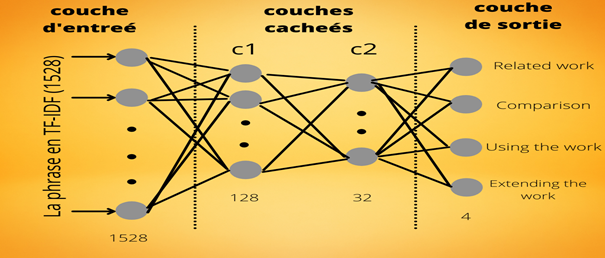

In [ ]:
tvec1  = TfidfVectorizer(max_features=1528).fit(saved_corpus)
x_train, x_test, y_train, y_test = train_test_split(saved_corpus, saved_sentiments, test_size=0.2, random_state=42)
x_train_tfidf = tvec1.transform(x_train)
x_test_tfidf = tvec1.transform(x_test)
model = Sequential()
model.add(Dense(128, activation='softmax', input_dim=1528))
model.add(Dense(32, 'softmax'))
model.add(Dense(4, 'softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train_tfidf.toarray(), y_train, epochs=100,validation_data=(x_test_tfidf.toarray(), y_test), verbose=0)

val_acc = history.history['val_acc']
#max_values.append(max(val_acc))
title = ' max validation = '+ str(max(val_acc))
plot_history(history,title)

score = model.evaluate(x_test_tfidf.toarray(), y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
#print(i)


#model.save("model89_19.h5")
#print("Saved model to disk")

In [ ]:
#saved_corpus=list_data[7]
#saved_sentiments = list_sentiments [7]
#saved_data123 = pd.DataFrame(columns=['TF_IDF','FOLLOW_UP'])
#saved_data123['TF_IDF']=saved_corpus
#saved_data123['FOLLOW_UP']=saved_sentiments


#saved_data123.to_csv('saved_data123.csv')

# **Classification binaire**

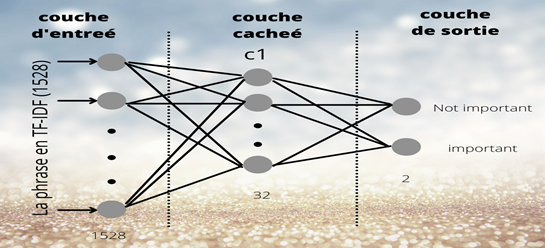

In [ ]:
#sentiments2 = 
saved_data['FOLLOW_UP'] = saved_data['FOLLOW_UP'].replace([0,1],0)
saved_data['FOLLOW_UP'] = saved_data['FOLLOW_UP'].replace([2,3],1)
saved_data['FOLLOW_UP'].value_counts()

In [ ]:
tvec1  = TfidfVectorizer(max_features=1528).fit(saved_corpus)
x_train_tfidf, x_test_tfidf, y_train, y_test = train_test_split(saved_data['TF_IDF'], saved_data['FOLLOW_UP'], test_size=0.2, random_state=42)
x_train_tfidf = tvec1.transform(x_train)
x_test_tfidf = tvec1.transform(x_test)


In [ ]:
from keras.backend import clear_session

clear_session()
ourmodelBI = Sequential()
ourmodelBI.add(Dense(32, activation='softmax', input_dim=1528))
#model.add(Dense(32, 'softmax'))
ourmodelBI.add(Dense(2, 'softmax'))
ourmodelBI.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = ourmodelBI.fit(x_train_tfidf.toarray(), y_train, epochs=50,validation_data=(x_test_tfidf.toarray(), y_test), verbose=0)
score = ourmodelBI.evaluate(x_test_tfidf.toarray(), y_test, verbose=1)
val_acc = history.history['val_acc']
title = ' training and validation loss '
plot_history(history,title)



score = ourmodelBI.evaluate(x_test_tfidf.toarray(), y_test, verbose=0)
print("%s: %.2f%%" % (ourmodelBI.metrics_names[1], score[1]*100))
#print(i)



In [ ]:
import pickle
import pickle
model.save("model93_69.h5")
print("Saved model to disk")